<a href="https://colab.research.google.com/github/jcmachicao/uc_AI_finanzas/blob/main/AI_finanzas__efficientFrontier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize

In [2]:
# Simulated historical stock returns
np.random.seed(42)  # For reproducibility
num_assets = 4  # Number of assets
num_data_points = 1000  # Number of historical data points

# Generate random returns for the assets
mean_returns = [0.12, 0.18, 0.14, 0.10]  # Expected annual returns of assets
cov_matrix = np.array([
    [0.04, 0.02, 0.01, 0.02],
    [0.02, 0.05, 0.02, 0.01],
    [0.01, 0.02, 0.03, 0.01],
    [0.02, 0.01, 0.01, 0.04]
])  # Covariance matrix of asset returns

returns = np.random.multivariate_normal(mean_returns, cov_matrix, num_data_points)
returns_df = pd.DataFrame(returns, columns=[f'Asset_{i+1}' for i in range(num_assets)])

# Calculate mean returns and covariance matrix
mean_returns = returns_df.mean()
cov_matrix = returns_df.cov()

This code simulates historical stock returns for four assets and calculates their mean returns and covariance matrix. Let's break down each part:

3. **Define Parameters:**
   - `num_assets = 4`: Specifies the number of assets being simulated (four in this case).
   - `num_data_points = 1000`: Defines the number of historical data points to simulate (1000 days, for instance).
   - `mean_returns`: A list containing the *expected* annual returns for each of the four assets. These are *pre-defined* mean values.
   - `cov_matrix`: A NumPy array representing the covariance matrix of the asset returns. The covariance matrix describes how the returns of the different assets move in relation to each other.  A positive covariance indicates that the assets tend to move in the same direction, a negative covariance indicates they tend to move in opposite directions, and a covariance of zero suggests no linear relationship.


4. **Simulate Returns:**
   - `returns = np.random.multivariate_normal(mean_returns, cov_matrix, num_data_points)`: This is the core of the simulation. It uses `np.random.multivariate_normal` to generate random returns for the four assets.  It takes:
      - `mean_returns`:  The expected returns of the assets (the previously defined list).
      - `cov_matrix`: The covariance matrix defining the relationships between the asset returns.
      - `num_data_points`: The number of data points to generate (1000 in this case).
   - `returns_df = pd.DataFrame(...)`:  The generated returns (a NumPy array) are converted into a Pandas DataFrame.  The column names are set to `Asset_1`, `Asset_2`, `Asset_3`, and `Asset_4`. This makes the data more organized and easier to work with.

5. **Calculate Mean Returns and Covariance Matrix from Simulated Data:**
   - `mean_returns = returns_df.mean()`: This calculates the *actual* average return of each asset from the *simulated data*.  Note the difference.  Initially, `mean_returns` was set to predefined values, and now it's being recomputed based on the simulated data.
   - `cov_matrix = returns_df.cov()`:  This calculates the *actual* covariance matrix of the asset returns from the *simulated data*. Again, it recomputes the covariance from the simulated dataset.


**In summary:** The code simulates historical stock price data using a multivariate normal distribution (a statistical distribution that generates correlated random numbers). It then recalculates the mean returns and covariance matrix from the simulated data. While the code *imports* libraries for optimization and plotting, it does not use them in the provided snippet.  This part of the code is likely preparation for a later section where optimization (e.g., finding the optimal portfolio weights) and visualization will be performed.


In [3]:
mean_returns

,0
Asset_1,0.119260
Asset_2,0.170041
Asset_3,0.136583
Asset_4,0.097257


In [4]:
cov_matrix

,Asset_1,Asset_2,Asset_3,Asset_4
Asset_1,0.037752,0.016923,0.008812,0.018895
Asset_2,0.016923,0.047541,0.019493,0.008091
Asset_3,0.008812,0.019493,0.031363,0.009269
Asset_4,0.018895,0.008091,0.009269,0.038529


In [5]:
# Portfolio optimization functions
def portfolio_performance(weights, mean_returns, cov_matrix):
    """Calculate portfolio return and risk."""
    portfolio_return = np.dot(weights, mean_returns)
    portfolio_variance = np.dot(weights.T, np.dot(cov_matrix, weights))
    portfolio_std_dev = np.sqrt(portfolio_variance)
    return portfolio_return, portfolio_std_dev

def minimize_risk(weights, mean_returns, cov_matrix, target_return):
    """Constraint function for achieving a specific return."""
    portfolio_return, _ = portfolio_performance(weights, mean_returns, cov_matrix)
    return portfolio_return - target_return

def optimize_portfolio(mean_returns, cov_matrix, target_return):
    """Perform optimization to minimize risk for a target return."""
    num_assets = len(mean_returns)
    args = (mean_returns, cov_matrix)

    # Initial guess (equal weighting)
    init_guess = np.ones(num_assets) / num_assets

    # Constraints: sum of weights = 1, and target return
    constraints = (
        {'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1},  # Weights sum to 1
        {'type': 'eq', 'fun': minimize_risk, 'args': args + (target_return,)}  # Achieve target return
    )

    # Bounds for weights (0 to 1)
    bounds = tuple((0, 1) for _ in range(num_assets))

    # Minimize portfolio risk (standard deviation)
    result = minimize(
        lambda weights: portfolio_performance(weights, mean_returns, cov_matrix)[1],  # Minimize risk
        init_guess,
        method='SLSQP',
        bounds=bounds,
        constraints=constraints
    )
    return result

In [6]:
# Perform optimization for different target returns
target_returns = np.linspace(mean_returns.min(), mean_returns.max(), 20)
optimal_portfolios = []

for target_return in target_returns:
    result = optimize_portfolio(mean_returns, cov_matrix, target_return)
    if result.success:
        optimal_portfolios.append(result.x)

In [12]:
optimal_portfolios

[array([1.79853897e-08, 0.00000000e+00, 5.55111512e-17, 9.99999982e-01]),
 array([1.26655669e-01, 1.73472348e-18, 2.65456529e-02, 8.46798678e-01]),
 array([1.54280946e-01, 5.20417043e-18, 1.08498073e-01, 7.37220981e-01]),
 array([1.82607398e-01, 3.46944695e-18, 1.90058194e-01, 6.27334408e-01]),
 array([0.21086209, 0.        , 0.27165846, 0.51747945]),
 array([0.23911874, 0.        , 0.35325764, 0.40762363]),
 array([0.2508278 , 0.02291915, 0.40169715, 0.3245559 ]),
 array([0.23711248, 0.08169363, 0.39800173, 0.28319217]),
 array([0.22305223, 0.14014398, 0.39509916, 0.24170463]),
 array([0.21035613, 0.19981081, 0.38918196, 0.2006511 ]),
 array([0.19658194, 0.25852453, 0.38563191, 0.15926162]),
 array([0.18322917, 0.31758412, 0.38120597, 0.11798074]),
 array([0.1697311 , 0.37653555, 0.3770615 , 0.07667185]),
 array([0.15621522, 0.43547013, 0.37295818, 0.03535648]),
 array([1.35859429e-01, 4.97867330e-01, 3.66273242e-01, 8.67361738e-19]),
 array([0.08039431, 0.58364421, 0.33596149, 0.    

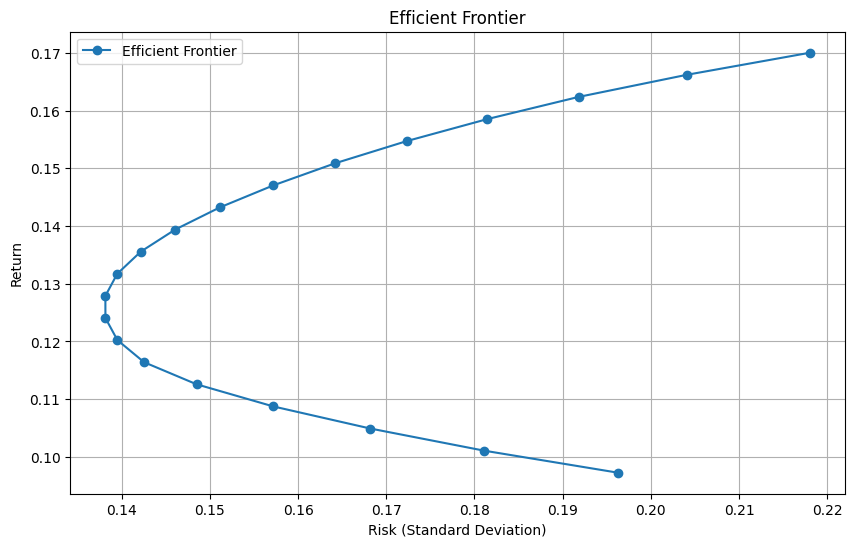

In [7]:
# Extract data for the efficient frontier
portfolio_returns = []
portfolio_risks = []

for weights in optimal_portfolios:
    ret, risk = portfolio_performance(weights, mean_returns, cov_matrix)
    portfolio_returns.append(ret)
    portfolio_risks.append(risk)

# Plot the efficient frontier
plt.figure(figsize=(10, 6))
plt.plot(portfolio_risks, portfolio_returns, marker='o', label='Efficient Frontier')
plt.title('Efficient Frontier')
plt.xlabel('Risk (Standard Deviation)')
plt.ylabel('Return')
plt.legend()
plt.grid(True)
plt.show()


In [8]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from scipy.optimize import minimize

In [15]:
# Step 1: Fetch real stock price data using yfinance
# Define the stock tickers and time period
tickers = ['NVDA', 'BTC-USD', 'GOOGL', 'TSLA']  # Example stocks: Apple, Microsoft, Google, Amazon
start_date = '2015-01-01'
end_date = '2023-12-31'

# Download adjusted closing prices
data = yf.download(tickers, start=start_date, end=end_date)['Adj Close']

# Step 2: Calculate daily returns
returns = data.pct_change().dropna()

# Calculate mean returns and covariance matrix
mean_returns = returns.mean()
cov_matrix = returns.cov()

[*********************100%***********************]  4 of 4 completed
<ipython-input-15-f05ae7c99fd9>:11: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns = data.pct_change().dropna()


In [16]:
mean_returns

,0
Ticker,
BTC-USD,0.002187
GOOGL,0.000618
NVDA,0.001725
TSLA,0.001298


In [17]:
cov_matrix

Ticker,BTC-USD,GOOGL,NVDA,TSLA
Ticker,,,,
BTC-USD,0.001376,0.000088,0.000162,0.000151
GOOGL,0.000088,0.000223,0.000208,0.000167
NVDA,0.000162,0.000208,0.000635,0.000317
TSLA,0.000151,0.000167,0.000317,0.000871


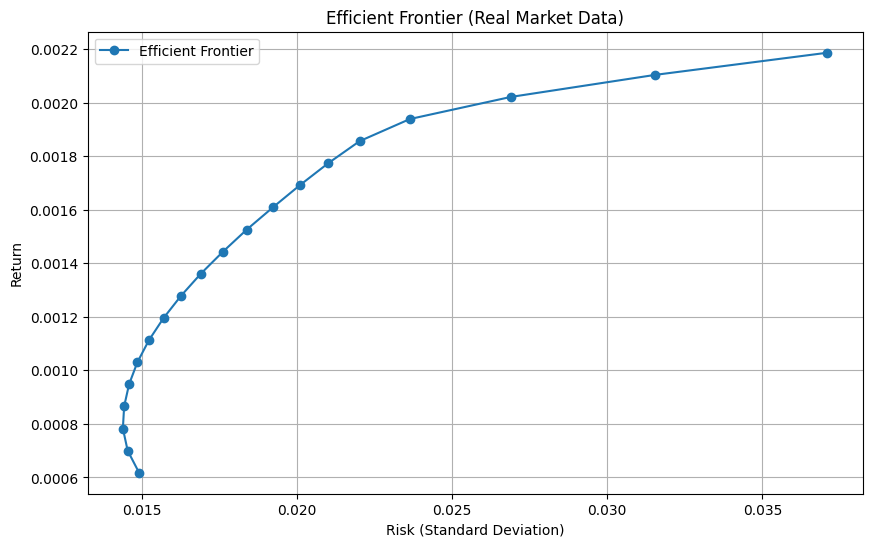

Optimal Weights for Lowest Target Return:
NVDA: 0.00%
BTC-USD: 100.00%
GOOGL: 0.00%
TSLA: 0.00%


In [18]:
# Step 3: Define portfolio optimization functions
def portfolio_performance(weights, mean_returns, cov_matrix):
    """Calculate portfolio return and risk."""
    portfolio_return = np.dot(weights, mean_returns)
    portfolio_variance = np.dot(weights.T, np.dot(cov_matrix, weights))
    portfolio_std_dev = np.sqrt(portfolio_variance)
    return portfolio_return, portfolio_std_dev

def minimize_risk(weights, mean_returns, cov_matrix, target_return):
    """Constraint function for achieving a specific return."""
    portfolio_return, _ = portfolio_performance(weights, mean_returns, cov_matrix)
    return portfolio_return - target_return

def optimize_portfolio(mean_returns, cov_matrix, target_return):
    """Perform optimization to minimize risk for a target return."""
    num_assets = len(mean_returns)
    args = (mean_returns, cov_matrix)

    # Initial guess (equal weighting)
    init_guess = np.ones(num_assets) / num_assets

    # Constraints: sum of weights = 1, and target return
    constraints = (
        {'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1},  # Weights sum to 1
        {'type': 'eq', 'fun': minimize_risk, 'args': args + (target_return,)}  # Achieve target return
    )

    # Bounds for weights (0 to 1)
    bounds = tuple((0, 1) for _ in range(num_assets))

    # Minimize portfolio risk (standard deviation)
    result = minimize(
        lambda weights: portfolio_performance(weights, mean_returns, cov_matrix)[1],  # Minimize risk
        init_guess,
        method='SLSQP',
        bounds=bounds,
        constraints=constraints
    )
    return result

# Step 4: Perform optimization for different target returns
target_returns = np.linspace(mean_returns.min(), mean_returns.max(), 20)
optimal_portfolios = []

for target_return in target_returns:
    result = optimize_portfolio(mean_returns, cov_matrix, target_return)
    if result.success:
        optimal_portfolios.append(result.x)

# Extract data for the efficient frontier
portfolio_returns = []
portfolio_risks = []

for weights in optimal_portfolios:
    ret, risk = portfolio_performance(weights, mean_returns, cov_matrix)
    portfolio_returns.append(ret)
    portfolio_risks.append(risk)

# Step 5: Plot the efficient frontier
plt.figure(figsize=(10, 6))
plt.plot(portfolio_risks, portfolio_returns, marker='o', label='Efficient Frontier')
plt.title('Efficient Frontier (Real Market Data)')
plt.xlabel('Risk (Standard Deviation)')
plt.ylabel('Return')
plt.legend()
plt.grid(True)
plt.show()

# Display optimal weights for the first portfolio
print("Optimal Weights for Lowest Target Return:")
for i, weight in enumerate(optimal_portfolios[0]):
    print(f"{tickers[i]}: {weight:.2%}")